<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 4***
"Análisis Exploratorio de Datos en Python (EDA, Exploratory Data Analysis)" 

---

Esta es la actividad 4 de física computacional, en esta practica se continuara con los temas vistos durante la actividad pasada ademas de introducir nuevas herramientas de las bibliotecas Matplotlib, Seaborn y Pandas.

Se realizarán una serie de análisis de datos para posteriormente elaborar gráficas estadísticas que pueden ser de mucho interés como lo son: Función de densidad, histograma, de barras, cajas y línea entre muchas otras. Con esto estaremos cada vez más cerca de obtener un reporte final con el cual podremos explicar y presentar todos los datos almacenados en la estación meteorológica seleccionada.


In [2]:
#Aqui introducimos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

#------------------------------------------------RETOMAMOS NUESTRO DATAFRAME DE LA ACTIVIDAD PASADA-------------------------------------------------------------------------------------

#Definimos como la direccion url donde se ubica nuestro archivo
url="https://raw.githubusercontent.com/GerardoxCarreon/FisicaComputacional1/master/Actividad3/Copia%20de%20Climatologia%20diaria_La%20Paz.txt"

#Definimos manualmente los nombres para nuestras columnas mediante la función my_cols
my_cols=[ 'Fecha' , 'Precip' , 'Evap' , 'Tempmax' , 'Tempmin' ]
#Definimos nuestro archivo como un csv con parametros para poder leerlo como Dataframe 
df_clim = pd.read_csv(url, names=my_cols, encoding='cp1252', sep='\s+', header=None, skiprows=19, skipfooter=1, skip_blank_lines=True, engine='python')

#Realizamos una copia del primer DataFrame 
df_cop=df_clim.copy()

#Sustituimos los valores marcados como Nulo en el DataFrame por espacios en blanco
#Para esto deberemos sustituir la copia del primer DataFrame por otra copia
str_Nulo = 'Nulo'
df_cop2 = df_cop.replace(to_replace=str_Nulo, value='', regex=True)

#Ahora convertiremos todos los valores numericos que el DataFrame almaceno como objetos a numeros flotantes
#Los datos que se convertiran en numeros flotantes seran los que se encuentran en las columnas de Precipitacion, Evaporacion, Tempmax y Tempmin
cols_list=['Precip', 'Evap', 'Tempmax', 'Tempmin']
for cols in cols_list:
  df_cop2[cols]=pd.to_numeric(df_cop2[cols], errors='coerce')

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop3=df_cop2.copy()

#Ahora convertiremos la informacion almacenada en la columna de Fecha del DataFrame de objeto a formato datetime
#Utilizamos la función pd.to_datetime que convierte la fecha en datetime 
#Definimos que la fecha este ordenada por dia, mes, año
df_cop3['Fecha']=pd.to_datetime(df_cop3['Fecha'], dayfirst=True).copy()

#Creamos dos nuevas columnas para el DataFrame las cuales contendran el Mes y Año de los datos, para esto extraeremos estos valores de la recien creada columna de Fecha
#Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_cop3['Año'] = df_cop3['Fecha'].dt.year
df_cop3['Mes'] = df_cop3['Fecha'].dt.month

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop4=df_cop3.copy()

#Imprimimos la informacion, descripcion estadistica, primeros y ultimos cinco renglones del DataFrame
print('INFORMACION DE DATAFRAME\n')
df_cop4.info()
print('')
print('ENCABEZADO DE DATAFRAME\n')
print(df_cop4.head())
print('')
print('PIE DE DATAFRAME\n')
print(df_cop4.tail())
print('')
print('DESCRPCION DE DATAFRAME\n')
df_cop4.describe().round(2)

#------------------------------------------------------FIN DE NUESTRO DATAFRAME DE LA ACTIVIDAD PASADA-------------------------------------------------------------------------------------

INFORMACION DE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18661 entries, 0 to 18660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    18661 non-null  datetime64[ns]
 1   Precip   18659 non-null  float64       
 2   Evap     1238 non-null   float64       
 3   Tempmax  18658 non-null  float64       
 4   Tempmin  18657 non-null  float64       
 5   Año      18661 non-null  int64         
 6   Mes      18661 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1020.6 KB

ENCABEZADO DE DATAFRAME

       Fecha  Precip  Evap  Tempmax  Tempmin   Año  Mes
0 1961-04-18     0.0   NaN     33.0      NaN  1961    4
1 1961-04-19     0.0   NaN     31.0     12.5  1961    4
2 1961-04-20     0.0   NaN     31.0     12.0  1961    4
3 1961-04-21     0.0   NaN     33.0     16.0  1961    4
4 1961-04-22     0.0   NaN     36.0     16.0  1961    4

PIE DE DATAFRAME

        

,Precip,Evap,Tempmax,Tempmin,Año,Mes
count,18659.00,1238.00,18658.00,18657.00,18661.00,18661.00
mean,1.12,4.22,29.85,13.81,1989.11,6.50
std,7.37,1.60,4.89,4.76,17.01,3.45
min,0.00,0.80,13.00,-4.00,1961.00,1.00
25%,0.00,2.90,26.00,10.00,1974.00,3.00
50%,0.00,4.00,30.00,13.00,1987.00,7.00
75%,0.00,5.20,34.00,18.00,2005.00,9.00
max,259.00,11.00,42.00,28.00,2017.00,12.00


In [ ]:
#En este paso, convertiremos la columna de Mes de variable numerica a variable categorica con la función .dt.strftime('%b'), esto con la finalidad de poder utilizar estas variables como etiquetas en una posible gráfica de datos
df_cop4.drop('Mes', axis=1, inplace=True)
df_cop4['Mes'] = df_cop3['Fecha'].dt.strftime('%b')
#Imprimimos la información y encabezado del DataFrame
print('INFORMACION DE DATAFRAME')
print('')
df_cop4.info()
print('ENCABEZADO DE DATAFRAME')
print('')
print(df_cop4.head())

INFORMACION DE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18661 entries, 0 to 18660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    18661 non-null  datetime64[ns]
 1   Precip   18659 non-null  float64       
 2   Evap     1238 non-null   float64       
 3   Tempmax  18658 non-null  float64       
 4   Tempmin  18657 non-null  float64       
 5   Año      18661 non-null  int64         
 6   Mes      18661 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1020.6+ KB
ENCABEZADO DE DATAFRAME

       Fecha  Precip  Evap  Tempmax  Tempmin   Año  Mes
0 1961-04-18     0.0   NaN     33.0      NaN  1961  Apr
1 1961-04-19     0.0   NaN     31.0     12.5  1961  Apr
2 1961-04-20     0.0   NaN     31.0     12.0  1961  Apr
3 1961-04-21     0.0   NaN     33.0     16.0  1961  Apr
4 1961-04-22     0.0   NaN     36.0     16.0  1961  Apr


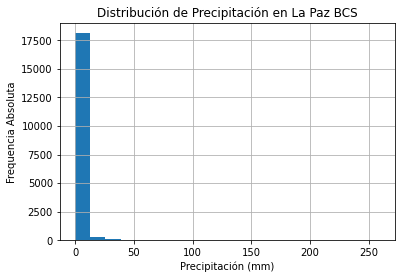

In [ ]:
#Ahora en esta sección, utilizaremos la biblioteca Matplotlib para generar una variedad de gráficas que nos serviran para representar los datos alacenados en nuestro DataFrame hasta el momento
#Comenzaremos gráficando un histograma de la precipitación 
plt.hist(df_cop4.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en La Paz BCS')
plt.grid()
plt.show()

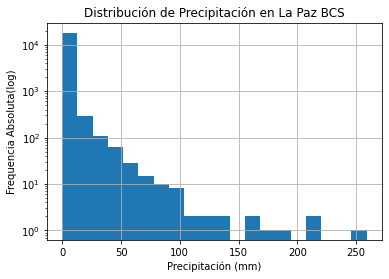

In [ ]:
#Como podemos observar, los valores de ciertos datos no se pueden apreciar adecuadamente por la escala en la que se encuentra la gráfica, por lo tanto es necesario cambiar la escala a una que sipermita apreciar dichos valores
#Se cambiara la escala del eje Y a una escala logaritmica
plt.hist(df_cop4.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta(log)')
plt.title('Distribución de Precipitación en La Paz BCS')
plt.grid()
plt.show()

HISTOGRAMA MATPLOTLIB



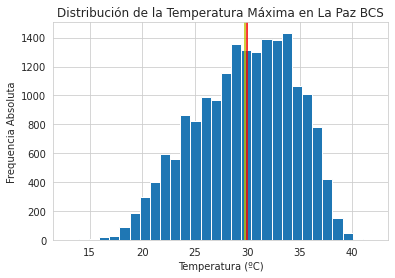


HISTOGRAMA SEABORN



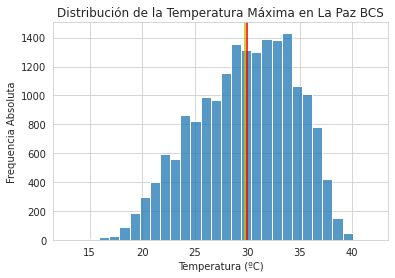


Temperatura mediana 30.0
Temperatura promedio 29.84580340872548


In [ ]:
#Con el conocimiento de estas herramientas nuevas, gráficar histogramas para las distintas variables de temperaturas
#Histograma de temperatura máxima
#Histograma utilizando el la biblioteca Matplotlib
print('HISTOGRAMA MATPLOTLIB')
print('')
#Calculamos la Mediana y el Promedio de nuestra Temperatura máxima 
Tmed = df_cop4.Tempmax.median() 
Tprom = df_cop4.Tempmax.mean()
plt.hist(df_cop4.Tempmax, bins=30)
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x=Tmed, color='r', label='m') 
plt.axvline(x=Tprom, color='y', label='x')
#Etiqueta de los ejes y titulo
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en La Paz BCS')
plt.show()  
print('')

#Histrograma utilizando la biblioteca Seaborn
print('HISTOGRAMA SEABORN')
print('')
sns.set_style("whitegrid")
#Calculamos la Mediana y el Promedio de nuestra Temperatura máxima 
Tmed = df_cop4.Tempmax.median() 
Tprom = df_cop4.Tempmax.mean()
sns.histplot(data=df_cop4, x='Tempmax', bins=30)
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x=Tmed, color='r', label='m') 
plt.axvline(x=Tprom, color='y', label='x')
#Etiqueta de titulo y ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en La Paz BCS')
plt.show() 
print('')
print('Temperatura mediana',(Tmed))
print('Temperatura promedio',(Tprom))

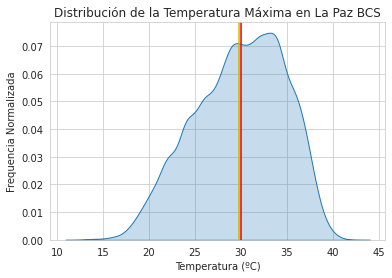


Temperatura mediana 30.0
Temperatura mediana 29.84580340872548


In [ ]:
#Realizamos gráfica de función densidad de probabilidad, KDE (Kernel Density Estimate)
#Utilizando la biblioteca seaborn
sns.kdeplot(df_cop4.Tempmax, fill=True);
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(Tmed, color='r'); 
plt.axvline(Tprom, color='y');
#Etiqueta de titulo y ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en La Paz BCS')
plt.show()
print('')
print('Temperatura mediana',(Tmed))
print('Temperatura mediana',(Tprom))

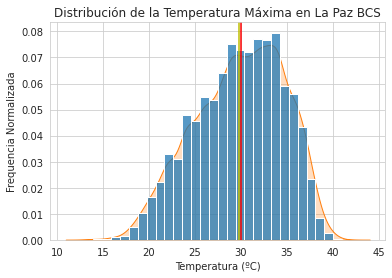


Temperatura mediana 30.0
Temperatura promedio 29.84580340872548


In [ ]:
#Realizamos una gráfica que grafique tanto el histograma como la función densidad de la temperatura máxima
sns.set_style("whitegrid")
sns.histplot(data=df_cop4, x='Tempmax', bins=30, stat='density');
sns.kdeplot(df_cop4.Tempmax, fill=True);
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(Tmed, color='r'); 
plt.axvline(Tprom, color='y');
#Etiqueta de titulo y ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en La Paz BCS')
plt.show()
print('')
print('Temperatura mediana',(Tmed))
print('Temperatura promedio',(Tprom))

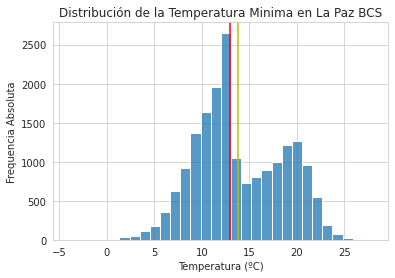


Temperatura mediana 13.0
Temperatura promedio 13.811497025245217


In [ ]:
#Ahora repetimos las mismas gráficas pero con los datos de temperatura minima
#Histrograma utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
#Calculamos la Mediana y el Promedio de nuestra Temperatura máxima 
Tmed = df_cop4.Tempmin.median() 
Tprom = df_cop4.Tempmin.mean()
sns.histplot(data=df_cop4, x='Tempmin', bins=30)
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x=Tmed, color='r', label='m') 
plt.axvline(x=Tprom, color='y', label='x')
#Etiqueta de titulo y ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Minima en La Paz BCS')
plt.show() 
print('')
print('Temperatura mediana',(Tmed))
print('Temperatura promedio',(Tprom))

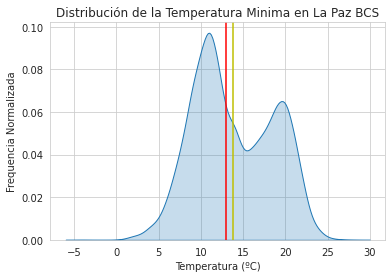


Temperatura mediana 13.0
Temperatura promedio 13.811497025245217


In [ ]:
#Realizamos gráfica de función densidad de probabilidad, KDE (Kernel Density Estimate)
#Utilizando la biblioteca seaborn
sns.kdeplot(df_cop4.Tempmin, fill=True);
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(Tmed, color='r'); 
plt.axvline(Tprom, color='y');
#Etiqueta de titulo y ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Minima en La Paz BCS')
plt.show()
print('')
print('Temperatura mediana',(Tmed))
print('Temperatura promedio',(Tprom))

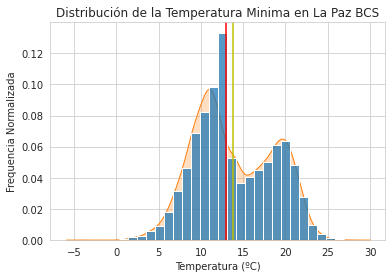


Temperatura mediana 13.0
Temperatura promedio 13.811497025245217


In [ ]:
#Realizamos una gráfica que grafique tanto el histograma como la función densidad de la temperatura minima
sns.set_style("whitegrid")
sns.histplot(data=df_cop4, x='Tempmin', bins=30, stat='density');
sns.kdeplot(df_cop4.Tempmin, fill=True);
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(Tmed, color='r'); 
plt.axvline(Tprom, color='y');
#Etiqueta de titulo y ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Minima en La Paz BCS')
plt.show()
print('')
print('Temperatura mediana',(Tmed))
print('Temperatura promedio',(Tprom))

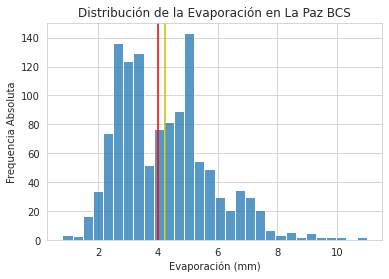

In [ ]:
#Realizamos un histograma con los datos de Evaporación para visualizar los datos almacenados en el DataFrame
#Gráfica de la Evaporación
sns.set_style("whitegrid")
#Calculamos la Mediana y el Promedio de la evaporación 
Ev_med = df_cop4.Evap.median() 
Ev_prom = df_cop4.Evap.mean()
sns.histplot(data=df_cop4, x='Evap', bins=30);
#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x=Ev_med, color='r', label='m') 
plt.axvline(x=Ev_prom, color='y', label='x')
#Etiqueta de titulo y ejes
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en La Paz BCS')
plt.show()

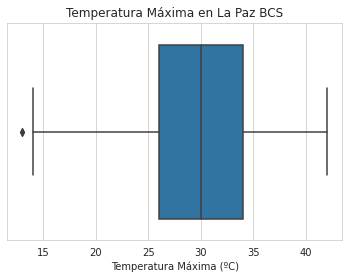

In [ ]:
#Ahora se introduciran las gráficas de cajas o Boxplots, estas se utilizaran para representar más claramente los datos almacenados de evaporación, temperatura máxima y minima dentro del DataFrame ya que este tipo de gráficas muestra de manera más visual la distrubución, los maximos y minimos, la media, moda y datos atipicos.
#Utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
#Gráfica de cajas para la Temperatura Máxima
sns.boxplot(x=df_cop4.Tempmax, data=df_cop4, orient='h').set(xlabel='Temperatura Máxima (ºC)', title='Temperatura Máxima en La Paz BCS');

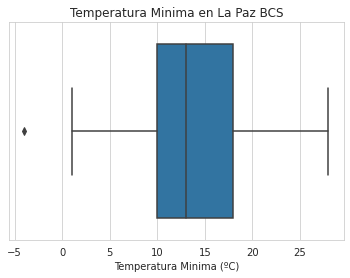

In [ ]:
#Gráfica de Temperatura Minima
sns.set_style("whitegrid")
#Gráfica de cajas para la Temperatura Minima
sns.boxplot(x=df_cop4.Tempmin, data=df_cop4, orient='h').set(xlabel='Temperatura Minima (ºC)', title='Temperatura Minima en La Paz BCS');

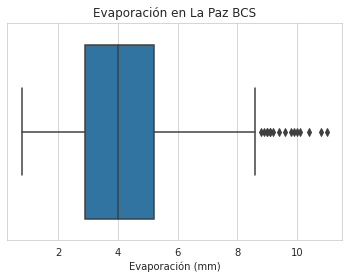

In [ ]:
#Gráfica de la Evaporación
sns.set_style("whitegrid")
#Gráfica de cajas para la Evaporación
sns.boxplot(x=df_cop4.Evap, data=df_cop4, orient='h').set(xlabel='Evaporación (mm)', title='Evaporación en La Paz BCS');

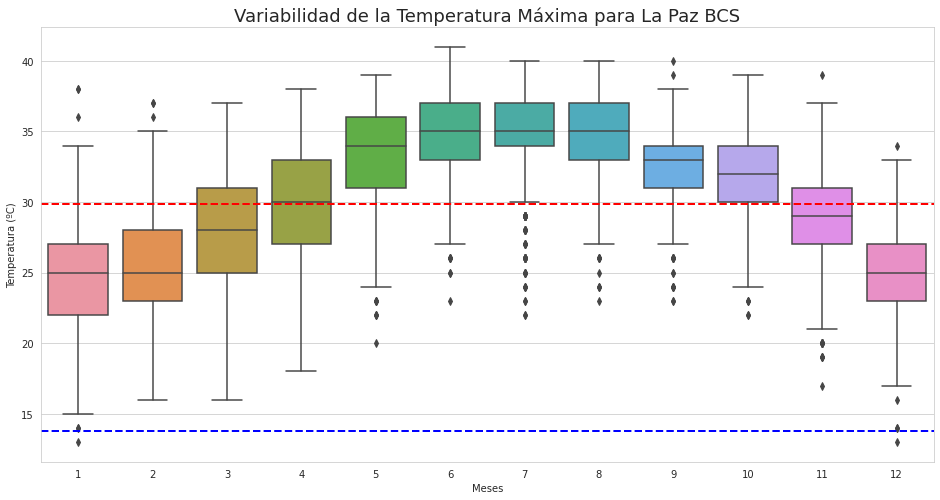

Promedio temperaturas máximas =  29.84580340872548
Promedio temperaturas minimas =  13.811497025245217
Diferencia entre temperatura máxima y minima =  16.034306383480263


In [8]:
#Ya introducidas las gráficas de cajas o Boxplots en las que se analizaron los datos de evaporación, temperatura máxima y minima; se generara otra gráfica de cajas para estas mismas variables solo que ahora dividiremos los datos por meses
#Primero analizaremos la Temperatura Máxima
#Gráfica de cajas de Temperaturas Máximas en los últimos 30 años agrupado por Mes
#Utilizando la biblioteca Seaborn
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Calculo de promedio de Temperaturas maximas y minimas de la Temperatura Máxima
Tempmax_ave = df_cop4.Tempmax.mean()
Tempmin_ave = df_cop4.Tempmin.mean()
#Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tempmax', data=df_90);
#Lineas horizontale de Temperatura maximo y minimo promedio 
plt.axhline(Tempmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tempmin_ave, color = 'b', linestyle='--', linewidth=2);
#Etiqueta de titulo y ejes
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para La Paz BCS', fontsize=18)
plt.show()
# Imprimir información de Temperaturas
print('Promedio temperaturas máximas = ', Tempmax_ave)
print('Promedio temperaturas minimas = ', Tempmin_ave)
print('Diferencia entre temperatura máxima y minima = ', (Tempmax_ave - Tempmin_ave))

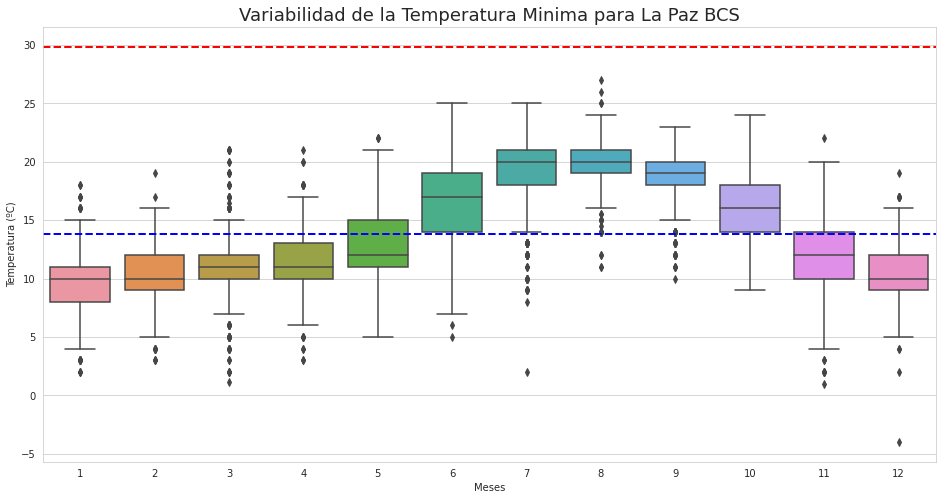

Promedio temperaturas máximas =  29.84580340872548
Promedio temperaturas minimas =  13.811497025245217
Diferencia entre temperatura máxima y minima =  16.034306383480263


In [9]:
#Ahora analizaremos la Temperatura Minima
#Gráfica de cajas de Temperaturas Minimos en los últimos 30 años agrupado por Mes
#Utilizando la biblioteca Seaborn
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Calculo de promedio de Temperaturas maximas y minimas de la Temperatura Máxima
Tempmax_ave = df_cop4.Tempmax.mean()
Tempmin_ave = df_cop4.Tempmin.mean()
#Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tempmin', data=df_90);
#Lineas horizontale de Temperatura maximo y minimo promedio 
plt.axhline(Tempmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tempmin_ave, color = 'b', linestyle='--', linewidth=2);
#Etiqueta de titulo y ejes
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Minima para La Paz BCS', fontsize=18)
plt.show()
# Imprimir información de Temperaturas
print('Promedio temperaturas máximas = ', Tempmax_ave)
print('Promedio temperaturas minimas = ', Tempmin_ave)
print('Diferencia entre temperatura máxima y minima = ', (Tempmax_ave - Tempmin_ave))

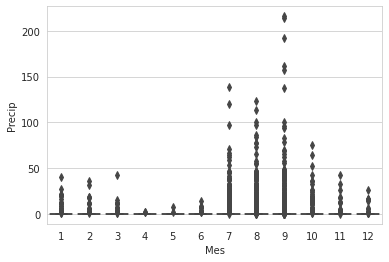

In [10]:
#La gráfica de cajas de la Precipitación por mes lamentablemente no arroja datos por lo tato solo se mostrara como es la gráfica pero no se entrar en detalles
sns.boxplot(x='Mes' , y='Precip', data=df_90);

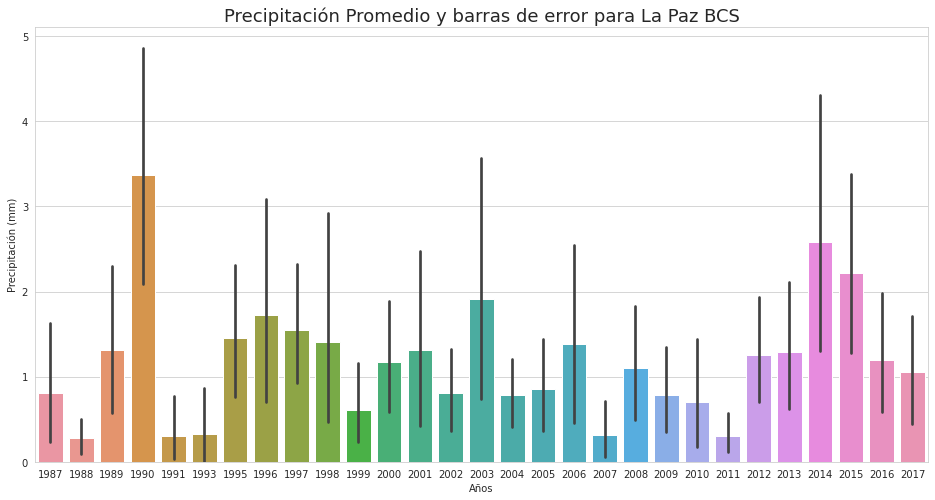

In [4]:
#Ahora realizaremos una gráfica comparativa de barras para los últimos 30 años de precipitación, gracias a que anteriormente declaramos las variables de Mes como variable categorica podremos realizar esta comparación
#Seleccionaremos un conjunto de años de 30 años  
df_90=df_cop4[(df_cop4['Año'] >= 1987) & (df_cop4['Año'] < 2018)]
#Utilizando la biblioteca Seaborn
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Gráficar precipitación por año
g=sns.barplot(x='Año', y='Precip', data=df_90);
#Etiqueta de titulo y ejes
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para La Paz BCS', fontsize=18)
plt.show()

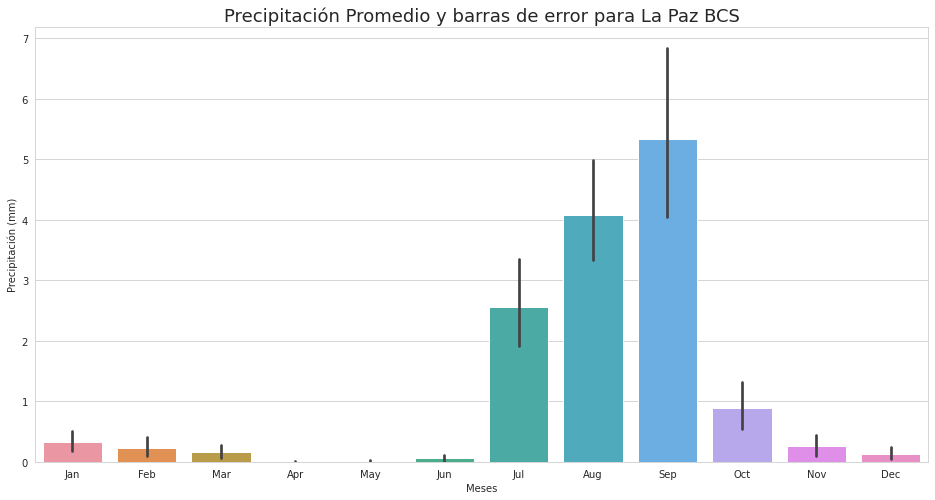

In [ ]:
#Ahora gráficaremos el mismo conjunto de datos de precipitación pero agrupados por mes
#Utilizando la biblioteca Seaborn
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Gráficar precipitación por mes
g=sns.barplot(x='Mes', y='Precip', data=df_90);
#Etiqueta de titulo y ejes
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para La Paz BCS', fontsize=18)
plt.show()

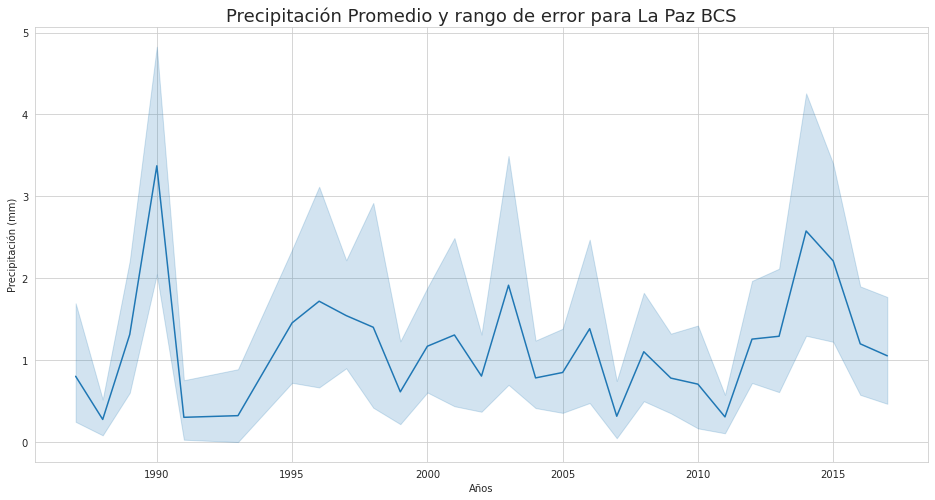

In [13]:
#Ahora, es turno de introducir las gráficas de lineas para esto utilizaremos los datos de precipitación de los ultimos 30 años y posteriormente los de temperaturas máximas y minimas.
#Gráfica de lineas precipitacion ultimos 30 años
#Utlizando la biblioteca Seaborn
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Gráficar precipitación por año
g=sns.lineplot(x='Año', y='Precip', data=df_90);
#Etiqueta de titulo y ejes
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para La Paz BCS', fontsize=18)
plt.show()

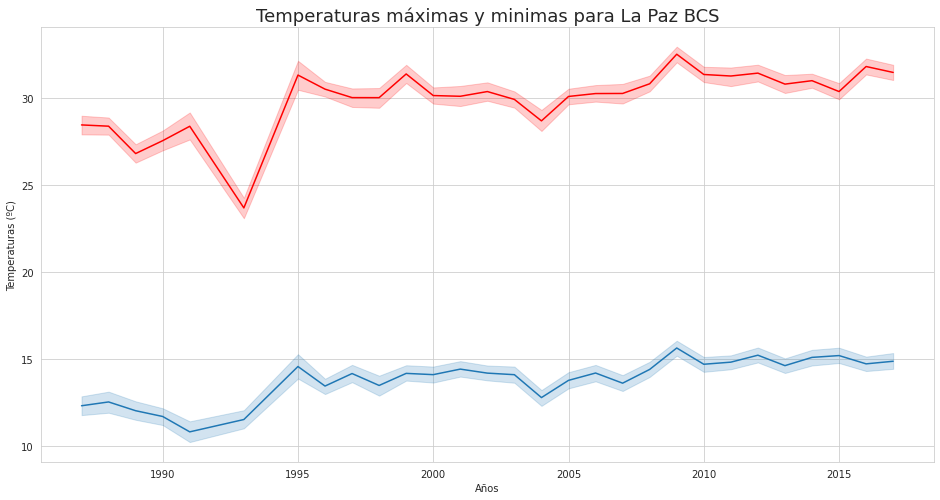

In [5]:
#Gráfica de Temperaturas (máximas y minimas) de últimos 30 años
#Utilizando la biblioteca Seaborn
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Gráficar temperatura máxima y minima por año
sns.lineplot(x='Año', y='Tempmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tempmin', data=df_90);
#Etiqueta de titulo y ejes
plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas máximas y minimas para La Paz BCS', fontsize=18)
plt.show()